<a href="https://colab.research.google.com/github/Elie87/PythonPojects/blob/main/Practice_3_TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')

pd.set_option('display.max_columns', 10)  # to visulazie all the colums from the describe function


Mounted at /content/drive


### Section 1. Exploratory Data Analysis

* 1.1: Data Loading and Understanding 
* 1.2: Data Cleaning 
* 1.3: Data Visualization

In [ ]:
data=pd.read_csv('/content/drive/My Drive/household_power_consumption.txt',delimiter=';',low_memory=False)
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [ ]:
print(data.info())
print("data.dtypes result is :")
print(data.dtypes)
print("description:")
print(data.describe(include=float))
print(data.describe(include=object))
print("the data shape is %s" %(str(data.shape)))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB
None
data.dtypes result is :
Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object
description:
       Sub_metering_3
count    2.049280e+06
mean     6.458447e+00
std      8.437154e+

We can make use of the date and time columns to easily search through our data. We will turn the date and time to indicies to easily navigate!

In [ ]:
data=pd.read_csv('/content/drive/My Drive/household_power_consumption.txt',infer_datetime_format=True,parse_dates={'datetime':[0,1]},index_col=['datetime'] ,delimiter=';',low_memory=False)
data.head()
#infer_datae_time=True, Pandas deduces the format of your datetime from the first element(s)
#parse_dates={'datetime':[0,1]}  create a new column of type date called 'datetime' from combining columns 0 and 1
#index_col=['datetime']:  pandas will use the colum ['datetime'] to be the index

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [ ]:
print(data.info())
print(data.describe(include='all'))
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    object 
 1   Global_reactive_power  object 
 2   Voltage                object 
 3   Global_intensity       object 
 4   Sub_metering_1         object 
 5   Sub_metering_2         object 
 6   Sub_metering_3         float64
dtypes: float64(1), object(6)
memory usage: 126.7+ MB
None
       Global_active_power Global_reactive_power  Voltage Global_intensity  \
count              2075259               2075259  2075259          2075259   
unique                4187                   533     2838              222   
top                      ?                 0.000        ?            1.000   
freq                 25979                481561    25979           172785   
mean                   NaN                   NaN      NaN              NaN   
std 

invesigate the "?" values
we can easly searh the data using the datetime

In [ ]:
import datetime
# search for April 29, 2007 using the datetime index on the dataframe
#data.loc[datetime.date(year=2007,month=4,day=29)]  # ? is used to represent missing values

# the previous line is not working with new verion of python
data.loc['2007-4-29'] 

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2007-04-29 00:00:00,?,?,?,?,?,?,NaN
2007-04-29 00:01:00,?,?,?,?,?,?,NaN
2007-04-29 00:02:00,?,?,?,?,?,?,NaN
2007-04-29 00:03:00,?,?,?,?,?,?,NaN
2007-04-29 00:04:00,?,?,?,?,?,?,NaN
...,...,...,...,...,...,...,...
2007-04-29 23:55:00,?,?,?,?,?,?,NaN
2007-04-29 23:56:00,?,?,?,?,?,?,NaN
2007-04-29 23:57:00,?,?,?,?,?,?,NaN


We must clean the data by finding the best solution for missing values

In [ ]:
data.replace('?',np.nan,inplace=True)
#data.loc[datetime.date(2007,4,29)]  # not wroking with new version of python
data.loc['2007-4-29'] 

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2007-04-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-04-29 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-04-29 00:02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-04-29 00:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-04-29 00:04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2007-04-29 23:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-04-29 23:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-04-29 23:57:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(data.isnull().sum())
# we wont drop all rows that have missing values, becasue we will loose 25979 row
#so we will replace the missing data with the mean
# to do that we must change the type of data to float
data=data.astype('float')
print(data.info())
data.fillna(data.mean(),axis=0,inplace=True)
print(data.isnull().sum())

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB
None
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64


In [ ]:
#lets make sure that the nan are replace by the right value
print(data.info())
print(data.describe())
#print(data.loc[datetime.date(year=2007,month=4,day=29)])
print(data.loc['2007-4-29'])

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB
None
       Global_active_power  Global_reactive_power       Voltage  \
count         2.075259e+06           2.075259e+06  2.075259e+06   
mean          1.091615e+00           1.237145e-01  2.408399e+02   
std           1.050655e+00           1.120142e-01  3.219643e+00   
min           7.600000e-02           0.000000e+00  2.232000e+02   
25%           3.100000e-01           4.800000e-02  2.390200e+02   
50%           6.300000e-01           1.020000e-01  2.409600e+02   
75%           1

#### Data Preprocessing

In [ ]:
# we can easily resample minutes to days
data_daily=data.resample('D',level=0).sum()
print(data_daily.shape) # must be reduce by 60*24 because the orgianl data was taken each minute
print(data_daily.head())

(1442, 7)
            Global_active_power  Global_reactive_power    Voltage  \
datetime                                                            
2006-12-16             1209.176                 34.922   93552.53   
2006-12-17             3390.460                226.006  345725.32   
2006-12-18             2203.826                161.792  347373.64   
2006-12-19             1666.194                150.942  348479.01   
2006-12-20             2225.748                160.998  348923.61   

            Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
datetime                                                                      
2006-12-16            5180.8             0.0           546.0          4926.0  
2006-12-17           14398.6          2033.0          4187.0         13341.0  
2006-12-18            9247.2          1063.0          2621.0         14018.0  
2006-12-19            7094.0           839.0          7602.0          6197.0  
2006-12-20            9313.0    

### Data Visualization

            Sub_metering_1  Sub_metering_2  Sub_metering_3
datetime                                                  
2006-12-16             0.0           546.0          4926.0
2006-12-17          2033.0          4187.0         13341.0
2006-12-18          1063.0          2621.0         14018.0
2006-12-19           839.0          7602.0          6197.0
2006-12-20             0.0          2648.0         14063.0


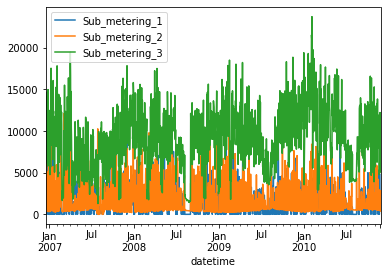

In [ ]:
daily_data_per_meter=data_daily.loc[:,['Sub_metering_1','Sub_metering_2','Sub_metering_3']]
print(daily_data_per_meter.head())
daily_data_per_meter.plot()  # can plot directly in pandas

Text(0, 0.5, 'Watt-hour')

<Figure size 432x288 with 0 Axes>

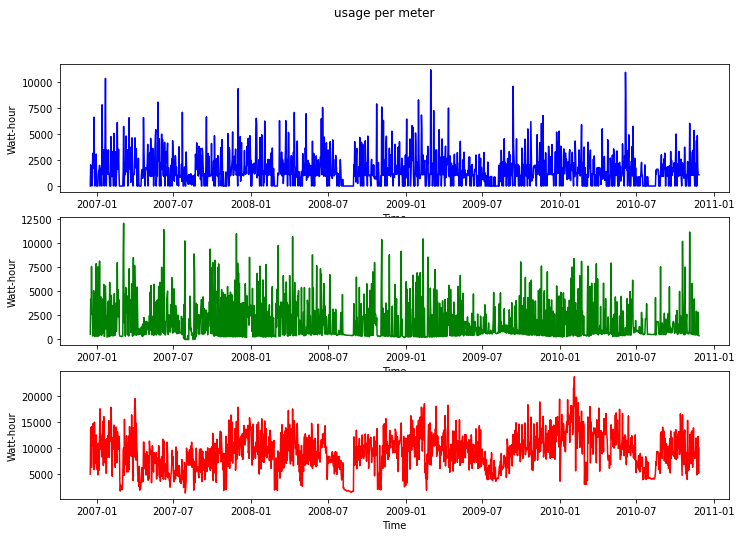

In [ ]:
plt.figure()
plt.figure(figsize=(12,8))
plt.suptitle("usage per meter")

plt.subplot(311)
plt.plot(data_daily['Sub_metering_1'],color='blue')
plt.xlabel('Time')
plt.ylabel('Watt-hour')

plt.subplot(312)
plt.plot(data_daily['Sub_metering_2'],color='green')
plt.xlabel('Time')
plt.ylabel('Watt-hour')

plt.subplot(313)
plt.plot(data_daily['Sub_metering_3'],color='red')
plt.xlabel('Time')
plt.ylabel('Watt-hour')



**Same result using seaborn**

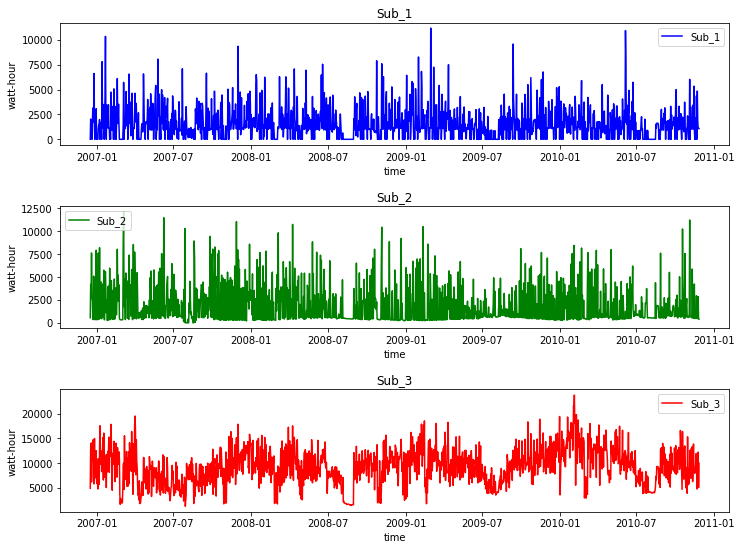

In [ ]:
fig,ax=plt.subplots(3,1,figsize=(12,9))

sns.lineplot(data=data_daily['Sub_metering_1'],color='blue',label='Sub_1',ax=ax[0])
ax[0].set_title('Sub_1')
ax[0].set(xlabel='time', ylabel='watt-hour')
ax[0].legend(loc='Upper_right')

sns.lineplot(data=data_daily['Sub_metering_2'],color='green',label='Sub_2',ax=ax[1])
ax[1].set_title('Sub_2')
ax[1].set(xlabel='time', ylabel='watt-hour')
ax[1].legend(loc='Upper_right')

sns.lineplot(data=data_daily['Sub_metering_3'],color='red',label='Sub_3',ax=ax[2])
ax[2].set_title('Sub_3')
ax[2].set(xlabel='time', ylabel='watt-hour')
ax[2].legend(loc='Upper_right')

fig.subplots_adjust(hspace = 0.5)  # to show the label (more space btween plots)


Starting date: 2006-12-16
Ending date: 2010-11-26	

If we want one week ahead prediction, it makes sense to use the previous week of data to predict the week ahead. 

To set this up properly, we would want our week to start on Monday and end on Sunday.

> The **first Monday in the dataset** is December 18, 2006 (which is the third row in the dataset).

> The **last Sunday in the dataset** is November 21, 2010. (which is the -6 from the end).

Organizing the data into the step up above, we would have a total of 205 weeks.

*NOPE.. didn't count them myself! Here's an online [calculator](https://planetcalc.com/274/?license=1).*

In [ ]:
data_daily.iloc[[-5]] # Last day for us
data_daily.iloc[[2]] # First day for us

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0


If we decide to divide our data into ~70% training and ~30% testing, then we would need:

30% of 205 weeks = 46 weeks

46 weeks = 322 days

We are starting at day -5 so we need to read up to -(322+5)= -327. **Great!**

In [ ]:
train_df=data_daily.iloc[2:-327,:]
train=train_df.values
test_df=data_daily.iloc[-327:-5,:]
test=test_df.values
print(train_df.index)
print(test_df.index)
print(train.shape)
print(test.shape)

DatetimeIndex(['2006-12-18', '2006-12-19', '2006-12-20', '2006-12-21',
               '2006-12-22', '2006-12-23', '2006-12-24', '2006-12-25',
               '2006-12-26', '2006-12-27',
               ...
               '2009-12-25', '2009-12-26', '2009-12-27', '2009-12-28',
               '2009-12-29', '2009-12-30', '2009-12-31', '2010-01-01',
               '2010-01-02', '2010-01-03'],
              dtype='datetime64[ns]', name='datetime', length=1113, freq='D')
DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-09', '2010-01-10', '2010-01-11',
               '2010-01-12', '2010-01-13',
               ...
               '2010-11-12', '2010-11-13', '2010-11-14', '2010-11-15',
               '2010-11-16', '2010-11-17', '2010-11-18', '2010-11-19',
               '2010-11-20', '2010-11-21'],
              dtype='datetime64[ns]', name='datetime', length=322, freq='D')
(1113, 7)
(322, 7)


In [ ]:
test_df.iloc[-1,:]

Global_active_power         900.910
Global_reactive_power       119.624
Voltage                  347299.480
Global_intensity           3798.600
Sub_metering_1                0.000
Sub_metering_2              506.000
Sub_metering_3             4778.000
Name: 2010-11-21 00:00:00, dtype: float64

In [ ]:
#we must have evry 7 day(1 week ) as an input, so we will split the data to len(data)/7 to know how many splits
train_split=np.split(train, len(train)/7)     # # spliting the data is usless because the data will be faltten again
train_2=np.array(train_split)

test_split=np.split(test,len(test)/7)
test_2=np.array(test_split)
print(train_2.shape)
print(test_2.shape)
print(train_2[0,:,:])

(159, 7, 7)
(46, 7, 7)
[[2.20382600e+03 1.61792000e+02 3.47373640e+05 9.24720000e+03
  1.06300000e+03 2.62100000e+03 1.40180000e+04]
 [1.66619400e+03 1.50942000e+02 3.48479010e+05 7.09400000e+03
  8.39000000e+02 7.60200000e+03 6.19700000e+03]
 [2.22574800e+03 1.60998000e+02 3.48923610e+05 9.31300000e+03
  0.00000000e+00 2.64800000e+03 1.40630000e+04]
 [1.71880723e+03 1.44413429e+02 3.47097990e+05 7.24785552e+03
  1.76724385e+03 2.62559704e+03 1.04339169e+04]
 [2.34133800e+03 1.86906000e+02 3.47305750e+05 9.89700000e+03
  3.15100000e+03 3.50000000e+02 1.11310000e+04]
 [4.77338600e+03 2.21470000e+02 3.45795950e+05 2.02004000e+04
  2.66900000e+03 4.25000000e+02 1.47260000e+04]
 [2.55001200e+03 1.49900000e+02 3.48029910e+05 1.10022000e+04
  1.70300000e+03 5.08200000e+03 6.89100000e+03]]


In [ ]:
#our model must take 7 days as input, this why our data must be reshaped to [d1 d2 d3 d4 d5 d6 d7] each row must represnet one day and 7 colums that are observation from the sensors
train_2=train_2.reshape(train_2.shape[0]*train_2.shape[1],train_2.shape[2])  # shape: [weeks*days, sensors]
print(train_2.shape)
test_2=test_2.reshape(test_2.shape[0]*test_2.shape[1],test_2.shape[2])  # shape: [weeks*days, sensors]
print(test_2.shape)
#the shape is the sam of train and test shape
'''
this cell has undo what the cell above have done,meaning there were both useless, but used for learning purposes
'''
print(len(train_2))

(1113, 7)
(322, 7)
1113


we will creat a function that will allow to take the X and y arrays to train our model from the data set

[Input]: 
[d01, d02, d03, d04, d05, d06, d07],
 [Output]: [d08, d09, d10, d11, d12, d13, d14]

[Input]:[d02, d03, d04, d05, d06, d07, d08], [Output]:[d09, d10, d11, d12, d13, d14, d15]


In [ ]:
def supervised_setup(data,start_col,end_col,y_index):  #satrt_index and end_index are the index of columns to be used as input for the model
                                                           #y_index are the column index that will be used as output of the model
 X=[]
 y=[]
 input_start=0
 n_input=7
 n_out=7
 for i in range(len(data)): #becasue each row in data represnet a day
  input_end=input_start+n_input
  output_end=input_end+n_out
  if output_end<=len(data):
   x_input=data[input_start:input_end,start_col:end_col]
   x_input_2=x_input.reshape(len(x_input),x_input.shape[1])# this line is useless becasue the x_input alfready have the wanted shape

   X.append(x_input_2) 

   y_input=data[input_end:output_end,y_index]
   y.append(y_input)
  
  input_start+=1
  if input_start==1:
    print(x_input.shape)
    print(x_input_2.shape)
    print(x_input)
    print(x_input_2)
 X=np.array(X)
 y=np.array(y)
 return X,y

X_train,y_train=supervised_setup(train_2,0,3,0) # because i want to take only the first 3 sensors power as input and predict the active power(the first feature)
X_test,y_test=supervised_setup(test,0,3,0)
'''
each model input will conist of an array of 7 rows wehre each rows represent a day and the number of columns will reprsent the sensors chosen to enter the predcition
'''

(7, 3)
(7, 3)
[[2.20382600e+03 1.61792000e+02 3.47373640e+05]
 [1.66619400e+03 1.50942000e+02 3.48479010e+05]
 [2.22574800e+03 1.60998000e+02 3.48923610e+05]
 [1.71880723e+03 1.44413429e+02 3.47097990e+05]
 [2.34133800e+03 1.86906000e+02 3.47305750e+05]
 [4.77338600e+03 2.21470000e+02 3.45795950e+05]
 [2.55001200e+03 1.49900000e+02 3.48029910e+05]]
[[2.20382600e+03 1.61792000e+02 3.47373640e+05]
 [1.66619400e+03 1.50942000e+02 3.48479010e+05]
 [2.22574800e+03 1.60998000e+02 3.48923610e+05]
 [1.71880723e+03 1.44413429e+02 3.47097990e+05]
 [2.34133800e+03 1.86906000e+02 3.47305750e+05]
 [4.77338600e+03 2.21470000e+02 3.45795950e+05]
 [2.55001200e+03 1.49900000e+02 3.48029910e+05]]
(7, 3)
(7, 3)
[[1.6041320e+03 1.5640400e+02 3.5380673e+05]
 [2.2197800e+03 1.4893600e+02 3.5211029e+05]
 [1.7771800e+03 1.5208000e+02 3.5313813e+05]
 [1.7694420e+03 1.1502400e+02 3.5266833e+05]
 [1.7972080e+03 1.5978000e+02 3.5194293e+05]
 [2.3369000e+03 1.9940000e+02 3.5117242e+05]
 [2.5084660e+03 2.2717000e+0

'\neach model input will conist of an array of 7 rows wehre each rows represent a day and the number of columns will reprsent the sensors chosen to enter the predcition\n'

In [ ]:
#Understand
print(test_df.iloc[-1,:])
print(y_test[-1])
print(test_df.iloc[-14,0])
print('lat row in x_test',X_test[-1,:,0])
print(y_test[-7])
print("--------------")
print(X_test[0,:,0])
print(y_test[0])
print(X_test[7,:,0])
print("--------")
print(train[-7:,0])
print(y_train[-1])


Global_active_power         900.910
Global_reactive_power       119.624
Voltage                  347299.480
Global_intensity           3798.600
Sub_metering_1                0.000
Sub_metering_2              506.000
Sub_metering_3             4778.000
Name: 2010-11-21 00:00:00, dtype: float64
[1747.382 1509.748 1582.032 1652.152 1570.4   2197.006  900.91 ]
1825.540000000001
lat row in x_test [1825.54  2022.098 1946.534 1773.592 1836.822 2023.174 2038.392]
[2022.098 1946.534 1773.592 1836.822 2023.174 2038.392 1747.382]
--------------
[1604.132 2219.78  1777.18  1769.442 1797.208 2336.9   2508.466]
[1518.684      1879.65142497 1571.92565256 1865.11237168 2196.76
 2150.112      1906.556     ]
[1518.684      1879.65142497 1571.92565256 1865.11237168 2196.76
 2150.112      1906.556     ]
--------
[2094.098      2047.968      2451.11       2211.892      1224.252
 1309.92761504 2083.454     ]
[2094.098      2047.968      2451.11       2211.892      1224.252
 1309.92761504 2083.454     ]


In [ ]:
print(type(X_train))
print(X_train.shape)
''' each row of the X_train contain an array which have the dimension(7,3): 7 for the number of days for each model input and 3 for the number of sensors coniders
so the input layer for our model will need to have the following shape(7,3) with total of 21 neurones
'''
print(X_train[0])
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

<class 'numpy.ndarray'>
(1100, 7, 3)
[[2.20382600e+03 1.61792000e+02 3.47373640e+05]
 [1.66619400e+03 1.50942000e+02 3.48479010e+05]
 [2.22574800e+03 1.60998000e+02 3.48923610e+05]
 [1.71880723e+03 1.44413429e+02 3.47097990e+05]
 [2.34133800e+03 1.86906000e+02 3.47305750e+05]
 [4.77338600e+03 2.21470000e+02 3.45795950e+05]
 [2.55001200e+03 1.49900000e+02 3.48029910e+05]]
(309, 7, 3)
(1100, 7)
(309, 7)


 ### model 1 building

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Flatten

# i msut use LSTM for the first layer because it will take into conisderation that i am dealing with a time sereies data, it will work on the for input martrix
# if a use a dense layer it will only take the last dimention of the input which is "3".
model=Sequential()
#model.add(Dense())# this wrong it won't deel with data as time series and it will only take the last input dimention 3, # if i try i see the number of param or this layer is very small
model.add(LSTM(40,input_shape=(X_train.shape[1],X_train.shape[2]),activation='relu',return_sequences=True))#set return_sequences=True to add new LSTM layer  
model.add(LSTM(60,activation='relu',return_sequences=True))
model.add(LSTM(60,activation='relu',return_sequences=True))
model.add(LSTM(60,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(X_train.shape[1],activation='linear'))

model.summary()
# number of param for lstm layer:
#params = 4 * ((size_of_input + 1) * size_of_output + size_of_output^2)
#params=4*(  (3+1)*40  +40^2)=7040, note that the size of the input is only considered 3.
model.compile(optimizer='adam',loss='mse')

model.fit(X_train,y_train,epochs=50,batch_size=10,verbose=1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 7, 40)             7040      
_________________________________________________________________
lstm_1 (LSTM)                (None, 7, 60)             24240     
_________________________________________________________________
lstm_2 (LSTM)                (None, 7, 60)             29040     
_________________________________________________________________
lstm_3 (LSTM)                (None, 60)                29040     
_________________________________________________________________
dense (Dense)                (None, 20)                1220      
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 147       
Total params: 90,727
Trainable params: 90,727
Non-trainable params: 0
____________________________________________________

#New model 

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Flatten

model=Sequential()
model.add(LSTM(40,input_shape=(X_train.shape[1],X_train.shape[2]),activation='relu',return_sequences=True))#set return_sequences=True to add new LSTM layer  
model.add(LSTM(60,activation='relu',return_sequences=True))
model.add(LSTM(60,activation='relu',return_sequences=False))
model.add(Flatten())  # i have added this Flaten layer here.
model.add(Dense(60,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(X_train.shape[1],activation='linear'))
# in my opinion this model make more sense because i have added a flatten layer after the 2-d lstm layer, to make a conection to all input,
# i am simply trying to memik the sampe approach used with Con2D and with Con2dlstm
# but this might be not necessary, as i have seen with other LSTM examples online
# maybe only setting the return_sequences=False is enough to add dense (or maybe not)
# the only way is to use both approch and test wich one will have better results
# For this i need further research to understand who LSTM works and keras connect them to other layres.

#A better approch would mean to use the ConvLstm2D layers+ flatten, which has proved to give better results.
model.summary()
model.compile(optimizer='adam',loss='mse')

model.fit(X_train,y_train,epochs=50,batch_size=10,verbose=1)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 7, 40)             7040      
_________________________________________________________________
lstm_5 (LSTM)                (None, 7, 60)             24240     
_________________________________________________________________
lstm_6 (LSTM)                (None, 60)                29040     
_________________________________________________________________
flatten (Flatten)            (None, 60)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 60)                3660      
_________________________________________________________________
dense_3 (Dense)              (None, 20)                1220      
_________________________________________________________________
dense_4 (Dense)              (None, 7)                

**Model evaluation**

In [ ]:

#function to prepare one week for prediciton, that will detect the needeed model input shape froom history(=X_train) array
def forecast(model,history):
  data=history[-1,:,:] # take only 1 row of X_test array because it contains one week with number of sensors needed
  x_input=data.reshape(1,history.shape[1],history.shape[2])
  y_predict=model.predict(x_input)


  return y_predict


In [ ]:
print(X_test[0])
print(y_test[0])
print(X_test[7,:,0])
#the prediction of the first week of (X_test[0]) is (y_test[0]=X_test[7])
#Meaning we dont have to bring X_train[-1]
#because it already worked for the fitting process we tooked only the X_train and y_train
#so for the evaluation we only need X_test and y_test

[[1.6041320e+03 1.5640400e+02 3.5380673e+05]
 [2.2197800e+03 1.4893600e+02 3.5211029e+05]
 [1.7771800e+03 1.5208000e+02 3.5313813e+05]
 [1.7694420e+03 1.1502400e+02 3.5266833e+05]
 [1.7972080e+03 1.5978000e+02 3.5194293e+05]
 [2.3369000e+03 1.9940000e+02 3.5117242e+05]
 [2.5084660e+03 2.2717000e+02 3.5113049e+05]]
[1518.684      1879.65142497 1571.92565256 1865.11237168 2196.76
 2150.112      1906.556     ]
[1518.684      1879.65142497 1571.92565256 1865.11237168 2196.76
 2150.112      1906.556     ]


**THE NUMBER OF ROWS IN X_TRAIN AND X_TEST IS EQUAL TO WEEK IN TRAIN AND TEST DFS BECUASE WE HAVE A 1DAY SHIFTING**

In [ ]:
#history=X_train
'''
# To start evaluating our model, we can not start from the last week in our training data , becuase this is already taken into consideration when splitting the data
#we must start from the testing data
#because the are 14 days difference betewenn the test.shape(322) and the x_test.shape(=308),
 becuase the last week can not be used in the y_test becasue we dont have the prediction yet
#and the week beefore the last week is only used in y_test 

'''
#in y_test we skip the first week of the tesing data.
#meaning that the first week could be used in x_test, and should not be taken from the last week of the training data set

prediction=np.zeros(shape=[1,7]) # an array of zeros is created becasue i want to use arrays only without the us of list,and an empty array will give random values
                              #during MSE evaluation the row of zeros must be removed

for i in range(len(X_test)): #it will stop at 308

  X_test_pre=X_test[i,:,:].reshape(1,X_test.shape[1],X_test.shape[2]) # this was reshpaed becasuse the np.concat need the same shapes, and X_test[i,:,:] is only 2-D
  y=model.predict(X_test_pre)
  prediction=np.concatenate((prediction,y),axis=0)

  '''
  history=np.concatenate((history,X_test_pre),axis=0)
  y=forecast(model,history)  #the first forecast is the last 
'''

'''
#testing
print(prediction[0])
print(prediction[1])
'''
prediction=np.delete(prediction,0,axis=0)  # remove the first row that has zeros
print(prediction.shape)
'''
#testing
print(prediction[0])
print(history.shape)
print(prediction.shape)
'''
'''
print(y_pre)
print(X_train.shape)
print(y_pre.shape)
'''

(309, 7)


'\nprint(y_pre)\nprint(X_train.shape)\nprint(y_pre.shape)\n'

In [ ]:
from sklearn.metrics import mean_squared_error
print(type(prediction))
print(prediction.shape)
print(y_test.shape)
score=[]
for i in range(y_test.shape[0]):
 mse=mean_squared_error(y_test[i,:],prediction[i,:])
 score.append(mse)

score_mean=np.array(score).mean()
print(score_mean)

<class 'numpy.ndarray'>
(309, 7)
(309, 7)
225633.58762213757


In [ ]:
from sklearn.metrics import mean_squared_error
print(type(prediction))
print(prediction.shape)
print(y_test.shape)
score=[]
for i in range(y_test.shape[1]):
 mse=mean_squared_error(y_test[:,i],prediction[:,i])
 rmse = np.sqrt(mse)
 score.append(rmse)

score_mean=np.array(score).mean()
print(score_mean)

<class 'numpy.ndarray'>
(309, 7)
(309, 7)
474.96993640808614


In [ ]:
from sklearn.metrics import mean_squared_error
print(type(prediction))
print(prediction.shape)
print(y_test.shape)

'''
for i in range(y_test.shape[0]):
 mse=mean_squared_error(y_test,prediction)
 score.append(mse)

score_mean=np.array(score).mean()
'''
score=mean_squared_error(y_test,prediction)
r_score=np.sqrt(score)
mean_score=r_score.mean()
print(mean_score)

<class 'numpy.ndarray'>
(309, 7)
(309, 7)
475.00903951623656


In [ ]:
#print(history.shape)
print(prediction.shape)


(309, 7)
